## 병합 군집
> 각 포인트를 하나의 클러스터로 지정하고, 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐나간다.

**옵션**
linkage : 가장 비슷한 클러스터를 측정하는 방법 지정
- ward : 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합침
- average : 포인트 사이의 평균거리가 가장 짧은 클러스터를 합침
- complete : 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합침



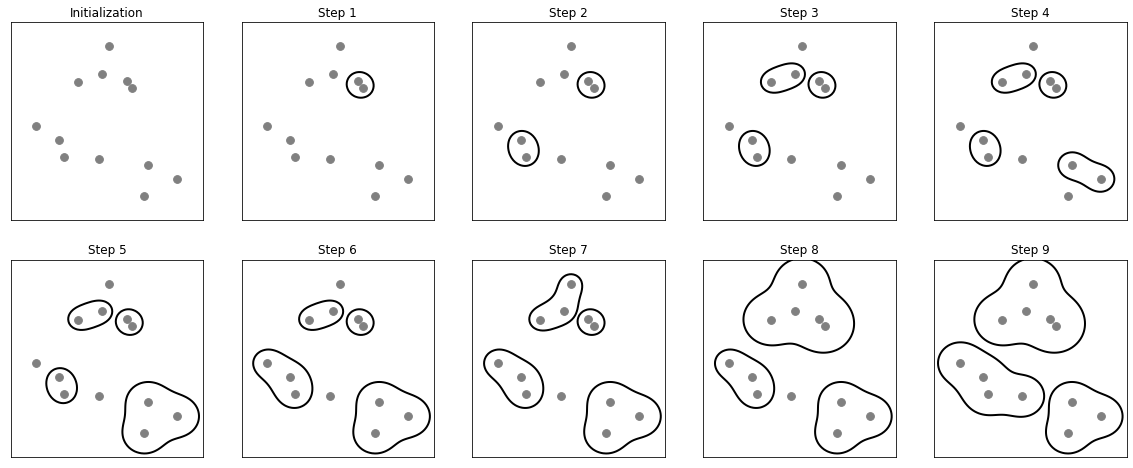

In [2]:
import mglearn
mglearn.plots.plot_agglomerative_algorithm()

가까운 클러스터끼리 합쳐지는 것을 볼 수 있음

+ 병합 군집은 새로운 데이터 포인트에 대해서는 예측을 할수 x (predict 함수 없음)
> 대신 훈련세트로 모델을 만들고, 클러스터 소속 정보를 얻기 위해서 fit_predict를 사용함


Text(0, 0.5, '특성 1')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53552 missing from c

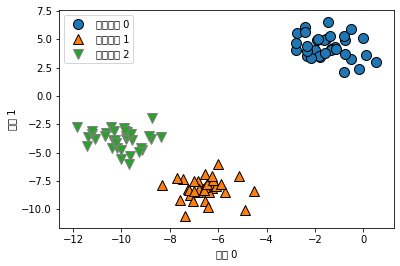

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(random_state = 1)

agg = AgglomerativeClustering(n_clusters = 3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc = "best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")


### 계층적 군집과 덴드로그램

병합 군집은 **계층적 군집**을 만든다.
+ 군집이 반복하여 진행되면서 중간 단계에 데이터에 대한 각기 다른 개수의 클러스터를 생성함


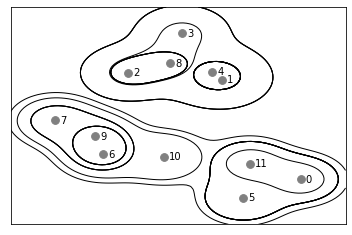

In [4]:
mglearn.plots.plot_agglomerative()

위와 같은 2차원 데이터셋의 계층은 그림으로 나타낼 수 있음, 하지만 다차원 부터는 **덴드로그램**을 이용하여 표시함
+ Scipy 군집 알고리즘은 데이터 배열 X를 받아 계층 군집의 유사도가 들어있는 연결 배열을 반환하는 함수를 제공 
+ 이 연결 배열을 dendogram함수에 넣어 그래프를 그릴 수 있음



Text(0, 0.5, '클러스터 거리')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47084 missing from c

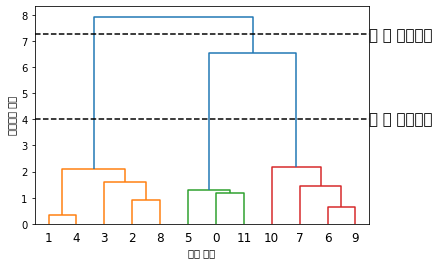

In [8]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state = 0, n_samples = 12)

linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c = 'k')
ax.plot(bounds, [4, 4], '--', c = 'k')

ax.text(bounds[1], 7.25, '두 개 클러스터', va = 'center', fontdict ={'size': 15})
ax.text(bounds[1], 4, '세 개 클러스터', va = 'center', fontdict ={'size': 15})

plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")


가지의 길이는 합쳐진 클러스터가 얼마나 멀리 떨어져 있는지 보여줌